In [5]:
print("""
@Title        : 统计图形绘制进阶：图形样式
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2024-01-17 21:01:20
@Description  : 
""")


@Title        : 统计图形绘制进阶：图形样式
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2024-01-17 21:01:20
@Description  : 



In [6]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## 设置坐标轴的刻度样式

刻度作为统计图形的一部分，由刻度标签和刻度线组成，如果需要进一步设置刻度样式，就需要介绍两个概念，定位器（locator）和刻度格式器（formatter）。刻度定位器用来设置刻度线的位置；刻度格式器用来设置刻度标签的显示样式。

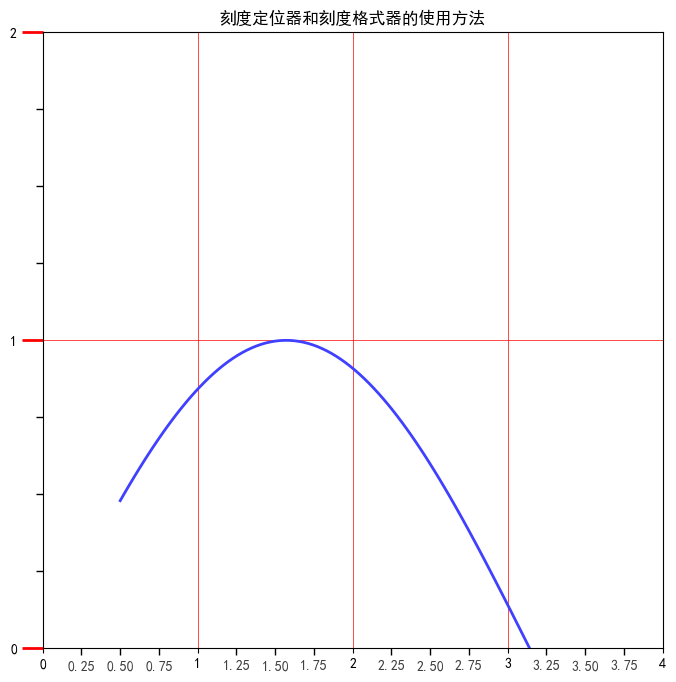

In [7]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

x = np.linspace(0.5, 3.5, 100)
y = np.sin(x)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.xaxis.set_major_locator(MultipleLocator(1.0))
ax.yaxis.set_major_locator(MultipleLocator(1.0))

ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))


def minor_tick(x, pos):
    # 如果不是主定位器，那么显示两位有效数字
    if not x % 1.0:
        return ""
    return f'{x:.2f}'


ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.tick_params('y', which='major',
               length=15, width=2.0, color='r')
ax.tick_params(which='minor',
               length=5, width=1.0, labelsize=10, labelcolor='0.25')
ax.set_xlim(0, 4)
ax.set_ylim(0, 2)
ax.plot(x, y, c=(0.25, .25, 1.00), lw=2, zorder=10)

ax.grid(linestyle='-', linewidth=.5, color='r', zorder=0)
plt.title('刻度定位器和刻度格式器的使用方法')
plt.show()

实例方法 `tick_params()` 关键字参数的具体含义如下所示。
- `which`：设置主刻度的样式。
- `length`：设置主刻度线的长度。
- `width`：设置主刻度线的宽度。
- `colors`：设置主刻度线和主刻度标签的颜色。
- `labelsize`：设置次要刻度标签的大小。
- `labelcolor`：设置次要刻度标签的颜色。

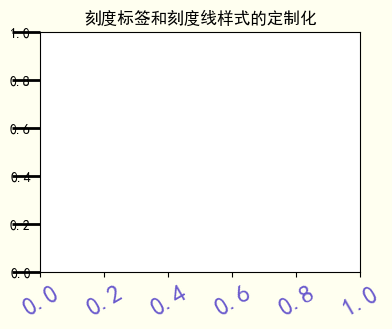

In [10]:
fig = plt.figure(facecolor=(1.0, 1.0, 0.9412))
ax = fig.add_axes([0.1, 0.4, 0.5, 0.5])
for tick_label in ax.xaxis.get_ticklabels():
    tick_label.set_color('slateblue')
    tick_label.set_fontsize(18)
    tick_label.set_rotation(30)

for tick_line in ax.yaxis.get_ticklines():
    # color 好像不生效
    tick_line.set_color('red')
    tick_line.set_markersize(20)
    tick_line.set_markeredgewidth(2)

plt.title('刻度标签和刻度线样式的定制化')
plt.show()

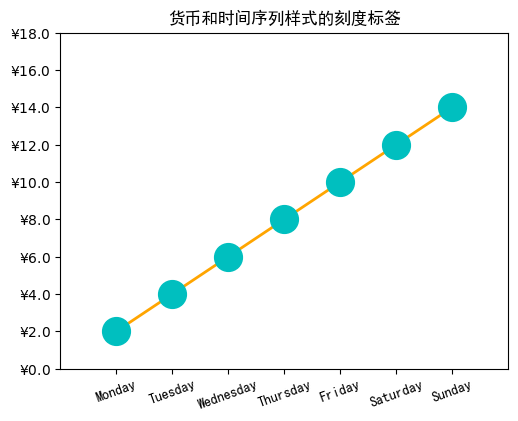

In [13]:
from matplotlib.ticker import FormatStrFormatter
from calendar import day_name

fig = plt.figure()
ax = fig.add_axes([.2, .2, .7, .7])
x = np.arange(1, 8, 1)
y = 2 * x
ax.plot(x, y, ls='-', lw=2, color='orange', marker='o',
        ms=20, mfc='c', mec='c')
ax.set_xlim(0, 8)
ax.yaxis.set_major_formatter(FormatStrFormatter(r'$\yen%1.1f$'))
ax.set_xticks(x, day_name[0:7], rotation=20)
ax.set_ylim(0, 18)
ax.set_title('货币和时间序列样式的刻度标签')
plt.show()

## 添加有指示注解和无指示注解

有指示注解是通过箭头指示的方法对绘图区域中的内容进行解释的标注方法。无指示注解是单纯使用文本进行内容解释或是说明的标注方法。

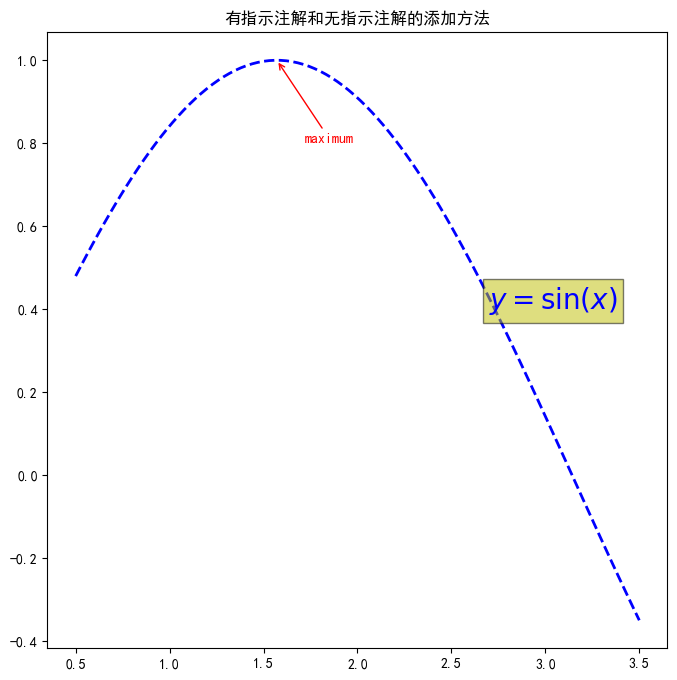

In [15]:
x = np.linspace(0.5, 3.5, 100)
y = np.sin(x)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

ax.plot(x, y, c='b', ls='--', lw=2)
ax.annotate('maximum', xy=(np.pi / 2, 1.0), xycoords='data',
            xytext=(np.pi / 2 + 0.15, .8), textcoords='data', weight='bold', color='r',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='r'))
ax.text(2.7, .4, '$y=\sin(x)$', fontsize=20,
        color='b', bbox=dict(facecolor='y', alpha=.5))
plt.title('有指示注解和无指示注解的添加方法')
plt.show()

通过调用 `ax.annotate(s, xy, xycoords, xytext, textcoords, weight, color, arrowprops)` 语句来实现绘制有指示注解的目标，其中参数的含义如下所示：

- `s`：注解的内容。
- `xy`：需要进行解释的位置，即被解释内容的位置。
- `xycoords`：xy 的坐标系统，参数值 data 表示与折线图使用相同的坐标系统。
- `xytext`：注释内容所在的位置，如果把注释内容想象成一个矩形，xytext 标记的是左上角顶点的位置。
- `textcoords`：xytext 的坐标系统。
- `weight`：注解内容的显示风格。
- `color`：注解内容的颜色。
- `arrowprops`：指示箭头的属性，包括箭头风格、颜色等。

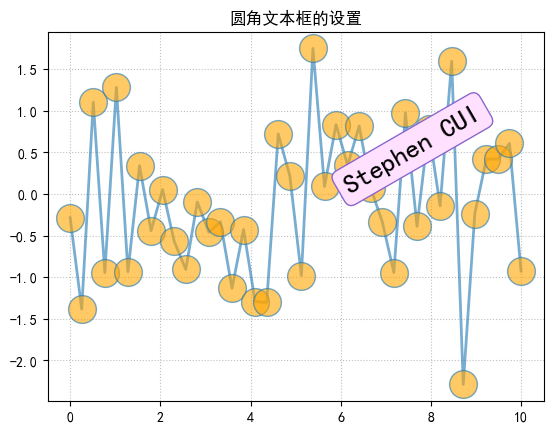

In [16]:
x = np.linspace(0.0, 10, 40)
y = np.random.randn(40)

plt.plot(x, y, ls="-", lw=2,
         marker="o",
         ms=20,
         mfc="orange",
         alpha=0.6)
plt.grid(ls=":", color="gray", alpha=0.5)
plt.text(6, 0, 'Stephen CUI', size=20, rotation=30, bbox=dict(boxstyle='round',
                                                              ec="#8968CD", fc="#FFE1FF"))
# plt.text(6, 0, 'Stephen CUI', size=30, rotation=30, bbox=dict(boxstyle='square',
#                                                               ec="#8968CD", fc="#FFE1FF"))
plt.title('圆角文本框的设置')
plt.show()

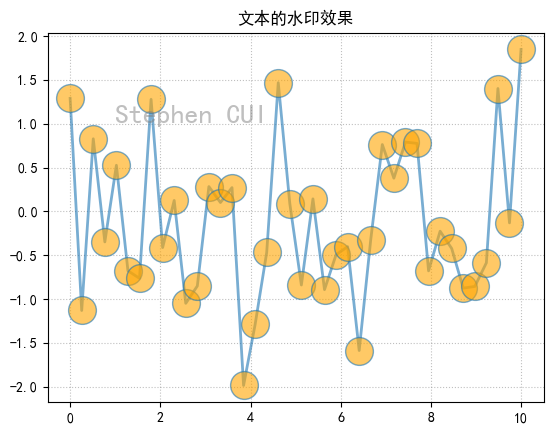

In [19]:
x = np.linspace(0.0, 10, 40)
y = np.random.randn(40)

plt.plot(x, y, ls="-", lw=2,
         marker="o",
         ms=20,
         mfc="orange",
         alpha=.6)
plt.grid(ls=":", color="gray", alpha=0.5)
# 关键字参数 alpha
plt.text(1, 1, 'Stephen CUI', size=20, color='gray', alpha=.5)
plt.title('文本的水印效果')
plt.show()

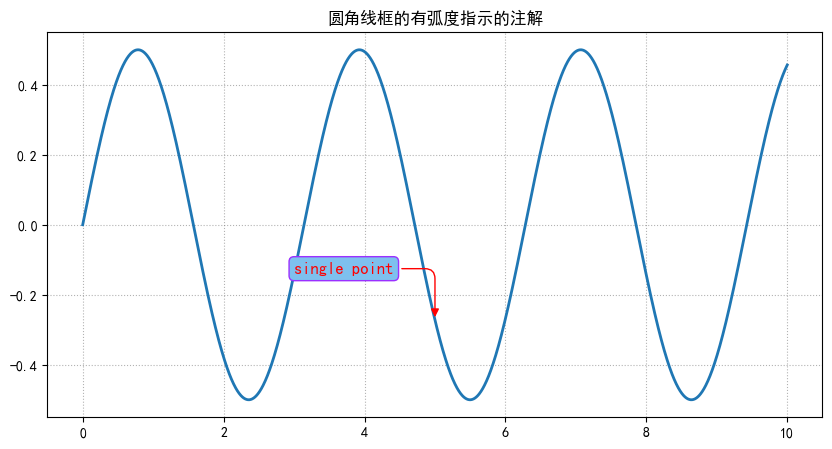

In [20]:
x = np.linspace(0, 10, 2000)
y = np.sin(x) * np.cos(x)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.plot(x, y, ls="-", lw=2)

bbox = dict(boxstyle='round', fc="#7EC0EE", ec="#9B30FF")
arrowprops = dict(arrowstyle='-|>',
                  connectionstyle='angle, angleA=0, angleB=90, rad=10', color='r')
ax.annotate('single point', (5, np.sin(5) * np.cos(5)),
            xytext=(3, np.sin(3)*np.cos(3)),
            fontsize=12, color="r",
            bbox=bbox, arrowprops=arrowprops)
ax.grid(ls=":", color="gray", alpha=0.6)
plt.title('圆角线框的有弧度指示的注解')
plt.show()

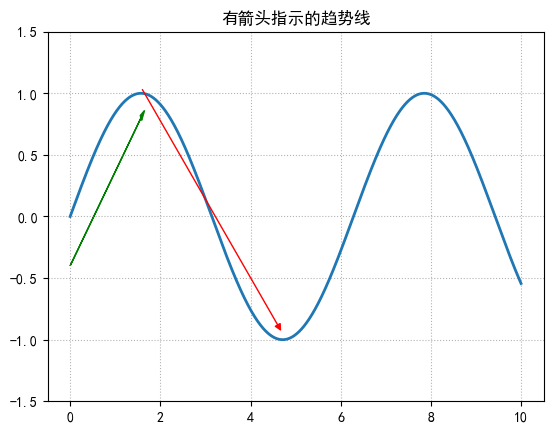

In [21]:
x = np.linspace(0, 10, 2000)
y = np.sin(x)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, ls="-", lw=2)
ax.set_ylim(-1.5, 1.5)
arrowprops = dict(arrowstyle="-|>", color="r")
ax.annotate("",
            (3*np.pi/2, np.sin(3*np.pi/2)+0.05),
            xytext=(np.pi/2, np.sin(np.pi/2)+0.05),
            color="r",
            arrowprops=arrowprops)
ax.arrow(0.0, -0.4, np.pi/2, 1.2,
         head_width=0.05, head_length=0.1,
         fc='g', ec='g')
ax.grid(ls=":", color="gray", alpha=0.6)
plt.title('有箭头指示的趋势线')
plt.show()

实例方法 `arrow(x, y, dx, dy)` 中的参数 `dx` 是参数 `x` 的水平增量，对应的参数 `dy` 是参数 `y` 的垂直增量。

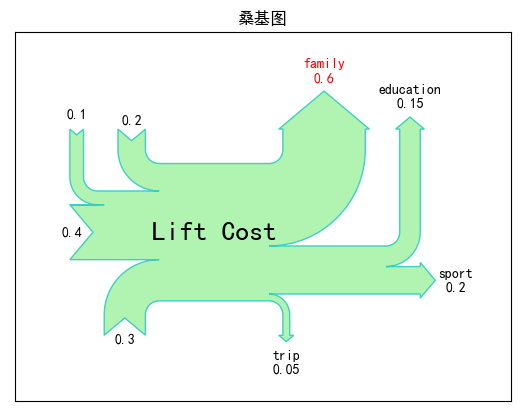

In [23]:
from matplotlib.sankey import Sankey
flows = [0.2, 0.1, 0.4, 0.3, -0.6, -0.05, -0.15, -0.2]
labels = ["", "", "", "", "family", "trip", "education", "sport"]
orientations = [1, 1, 0, -1, 1, -1, 1, 0]
sankey = Sankey()
sankey.add(flows=flows, labels=labels, orientations=orientations,
           color='c', fc='lightgreen', patchlabel='Lift Cost', alpha=.7)
diagrams = sankey.finish()
diagrams[0].texts[4].set_color("r")
diagrams[0].texts[4].set_weight("bold")
diagrams[0].text.set_fontsize(20)
diagrams[0].text.set_fontweight("bold")
plt.title('桑基图')
plt.show()
# 说实话有点抽，没必要

列表 `orientations` 中的 −1、0 和 1 分别表示流量的显示位置在下方、水平和上方。

## 实现标题和坐标轴标签的投影效果

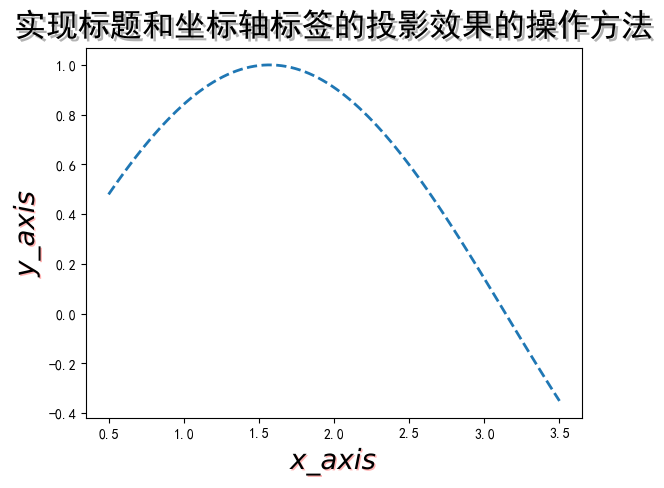

In [24]:
import matplotlib.patheffects as pes
x = np.linspace(0.5, 3.5, 100)
y = np.sin(x)
fontsize = 23
# plot a sin(x) func
plt.plot(x, y, ls="--", lw=2)
title = "实现标题和坐标轴标签的投影效果的操作方法"
xaxis_label = "$x\_axis$"
yaxis_label = "$y\_axis$"
title_text_obj = plt.title(title, fontsize=fontsize, va="bottom")
xaxis_label_text_obj = plt.xlabel(xaxis_label, fontsize=fontsize-3, alpha=1.0)
yaxis_label_text_obj = plt.ylabel(yaxis_label, fontsize=fontsize-3, alpha=1.0)
title_text_obj.set_path_effects([pes.withSimplePatchShadow()])
pe = pes.withSimplePatchShadow(offset=(1, -1), shadow_rgbFace='r', alpha=.3)
xaxis_label_text_obj.set_path_effects([pe])
yaxis_label_text_obj.set_path_effects([pe])
plt.show()

通过调用 `Artist` 抽象基类的实例方法 `Artist.set_path_effects(path_effects)` 来实现，实例方法 `set_path_effects(path_effects)` 中的参数 `path_effects` 是实例列表，列表中的实例就是调用 `pes` 类中的 `withSimplePatchShadow` 类。初始化函数 `withSimplePatchShadow()` 的主要参数的含义如下所示。
- `offset`：文本内容投影相对文本内容本身的偏离距离。
- `shadow_rgbFace`：投影的颜色。
- `alpha`：投影的透明度，范围是 0.0~1.0，数值越大透明度越小。

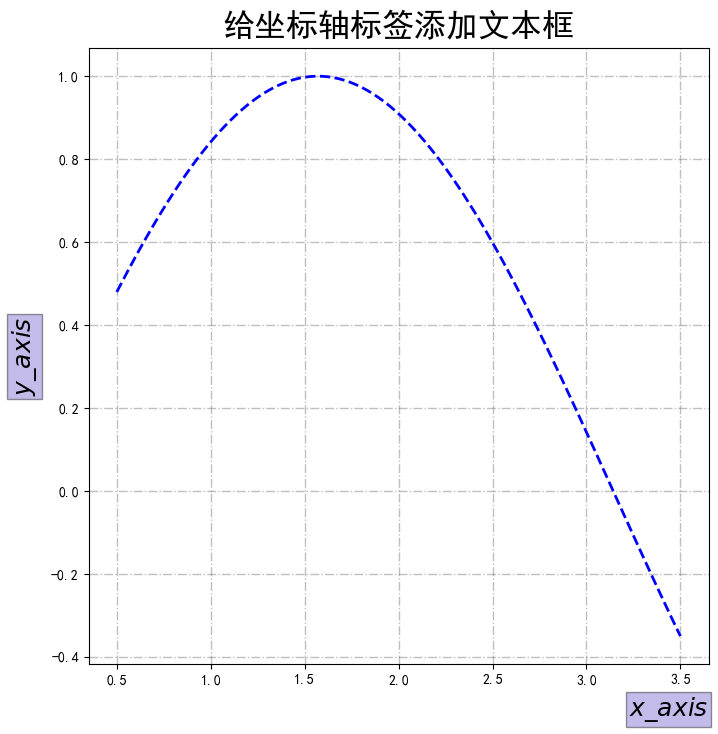

In [25]:
x = np.linspace(0.5, 3.5, 100)
y = np.sin(x)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
box = dict(facecolor="#6959CD", pad=2, alpha=0.4)
ax.plot(x, y, c="b", ls="--", lw=2)

title = "给坐标轴标签添加文本框"
xaxis_label = "$x\_axis$"
yaxis_label = "$y\_axis$"
ax.set_xlabel(xaxis_label, fontsize=18, bbox=box, loc='right')
ax.set_ylabel(yaxis_label, fontsize=18, bbox=box)
ax.set_title(title, fontsize=23, va="bottom")
ax.yaxis.set_label_coords(-0.08, 0.5)  # axes coords
ax.xaxis.set_label_coords(1, -0.05)  # axes coords
ax.grid(ls="-.", lw=1, color="gray", alpha=0.5)
plt.show()